In [2]:
# !pip install --upgrade tensorflow
# !pip install --upgrade keras

from matplotlib                 import pyplot as plt
from sklearn.metrics            import f1_score, precision_score, recall_score, confusion_matrix
from IPython.display            import Image
from numpy                      import array
import pandas as pd
import numpy  as np
import tensorflow as tf
from numpy import loadtxt
import keras
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Activation,Dropout,LSTM
from keras.layers import Conv1D,MaxPooling1D,Flatten
from keras.utils import to_categorical
from scipy.stats import zscore

In [3]:
df=pd.read_csv('general_model_train.csv',index_col=0)
X=df.drop(['DATE','TIME_M','jump'],axis=1)
Y=df['jump']
X.head()

C:\Users\xxhxx\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ask_bid_ratio,ask_bid_spread,time,ask_skew,bid_skew,jump_lag_1
0,-0.429805,0.009028,0.076923,-0.007311,0.000589,0.0
1,-0.634122,0.002870,0.076966,-0.001179,0.000776,0.0
2,-0.580048,0.002122,0.077009,-0.000310,0.001276,0.0
3,-0.174566,0.001515,0.077051,-0.000516,0.000301,0.0
4,-0.080043,0.000927,0.077094,-0.000224,0.000058,0.0


In [4]:
X['abs_ask_bid_ratio']=abs(X['ask_bid_ratio'])
X['abs_ask_bid_spread']=abs(X['ask_bid_spread'])
X['abs_ask_skew']=abs(X['ask_skew'])
X['abs_bid_skew']=abs(X['bid_skew'])

In [5]:
X=zscore(X)
Y=Y.values
np.mean(Y)

0.043881349533137944

In [6]:
len(X),len(Y)

(3610167, 3610167)

In [7]:
samples,steps,features=X.shape[0],20,X.shape[1]
print(samples,steps,features)
nX=np.zeros((samples-steps,steps,features))
for i in range(steps, samples):
    nX[i-steps] =X[i-steps:i]
X=nX
Y=Y[steps:]

# X_train=X[:int(len(X)*0.85)]
# Y_train=Y[:int(len(X)*0.85)]
# X_test=X[int(len(X)*0.85):]
# Y_test=Y[int(len(X)*0.85):]

3610167 20 10


In [20]:
# X_train.shape,Y_train.shape

((3308534, 20, 10), (3308534,))

In [21]:

# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(steps,features)))
# model.add(MaxPooling1D())
# model.add(Dropout(0.3))

# model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D())
# model.add(Dropout(0.3))


# model.add(Flatten())

# model.add(Dense(40))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.3))


# model.add(Dense(20))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.2))


# model.add(Dense(1, activation='sigmoid'))
# # adam=Adam(learning_rate=0.0000)
# model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 18, 16)            496       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 9, 16)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 16)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 16)             784       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 3, 16)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 16)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 48)               

In [22]:
# class_weight={0:1,1:3}
# model.fit(X_train,Y_train,batch_size=1000,epochs=10,class_weight={0:1,1:3},verbose=1)
#batch size matters
# sudden rapid drop of accuracy while training, on both training and test sets, why?

Epoch 1/10
3308534/3308534 [==============================] - 78s 24us/step - loss: 0.1202 - accuracy: 0.9858
Epoch 2/10
3308534/3308534 [==============================] - 49s 15us/step - loss: 0.0934 - accuracy: 0.9939
Epoch 3/10
3308534/3308534 [==============================] - 49s 15us/step - loss: 0.0910 - accuracy: 0.9939
Epoch 4/10
3308534/3308534 [==============================] - 47s 14us/step - loss: 0.0897 - accuracy: 0.9939
Epoch 5/10
3308534/3308534 [==============================] - 46s 14us/step - loss: 0.0891 - accuracy: 0.9939
Epoch 6/10
3308534/3308534 [==============================] - 48s 14us/step - loss: 0.0889 - accuracy: 0.9939
Epoch 7/10
3308534/3308534 [==============================] - 46s 14us/step - loss: 0.0887 - accuracy: 0.9939
Epoch 8/10
3308534/3308534 [==============================] - 47s 14us/step - loss: 0.0886 - accuracy: 0.9939
Epoch 9/10
3308534/3308534 [==============================] - 47s 14us/step - loss: 0.0885 - accuracy: 0.9939
Epoch 10/1

In [24]:
# from keras.models import load_model
# model.save('m.h5')
# model=load_model('model_10_features.h5')

583859/583859 [==============================] - 15s 26us/step


(0.6301827541408981, [0.044070477663863176, 0.9931849837303162])

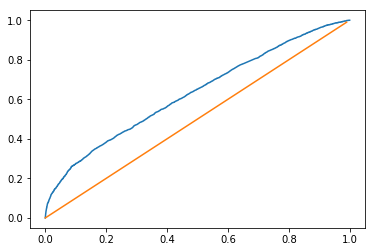

In [23]:
# from sklearn.metrics import roc_curve,roc_auc_score
# fpr,tpr,thresholds=roc_curve(Y_test,model.predict(X_test))
# plt.plot(fpr,tpr)
# plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
# roc_auc_score(Y_test,model.predict(X_test)),model.evaluate(X_test,Y_test)


In [8]:

model2 = Sequential()
model2.add(LSTM(10,input_shape=(steps,features),return_sequences=True))
model2.add(LSTM(1,input_shape=(steps,features)))

model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model2.summary())


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 10)            840       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 48        
Total params: 888
Trainable params: 888
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model2.fit(X,Y,batch_size=1000,epochs=10,class_weight={0:1,1:3},verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3610147/3610147 [==============================] - 90s 25us/step - loss: 0.3512 - accuracy: 0.9537
Epoch 2/10
3610147/3610147 [==============================] - 87s 24us/step - loss: 0.3189 - accuracy: 0.9513
Epoch 3/10
3610147/3610147 [==============================] - 90s 25us/step - loss: 0.3143 - accuracy: 0.9510
Epoch 4/10
3610147/3610147 [==============================] - 88s 24us/step - loss: 0.3102 - accuracy: 0.9506
Epoch 5/10
3610147/3610147 [==============================] - 88s 24us/step - loss: 0.3081 - accuracy: 0.9501
Epoch 6/10
3610147/3610147 [==============================] - 87s 24us/step - loss: 0.3070 - accuracy: 0.9497
Epoch 7/10
3610147/3610147 [==============================] - 88s 24us/step - loss: 0.3065 - accuracy: 0.9496
Epoch 8/10
3610147/3610147 [==============================] - 89s 25us/step - loss: 0.3059 - accuracy: 0.9495
Epoch 9/10
3610147/3610147 [==============================] - 88s 24us/s

In [5]:
from keras.models import load_model
# model2.save('m2.h5')
model2=load_model('m2.h5')

In [3]:
df=pd.read_csv('general_model_test.csv',index_col=0)
X=df.drop(['DATE','TIME_M','jump'],axis=1)
Y=df['jump']
# X.head()
X['abs_ask_bid_ratio']=abs(X['ask_bid_ratio'])
X['abs_ask_bid_spread']=abs(X['ask_bid_spread'])
X['abs_ask_skew']=abs(X['ask_skew'])
X['abs_bid_skew']=abs(X['bid_skew'])
X=zscore(X)
Y=Y.values
# np.mean(Y)
samples,steps,features=X.shape[0],20,X.shape[1]
print(samples,steps,features)
nX=np.zeros((samples-steps,steps,features))
for i in range(steps, samples):
    nX[i-steps] =X[i-steps:i]
X=nX
Y=Y[steps:]


529704 20 10


529684/529684 [==============================] - 52s 98us/step


(0.7772620903955637, [0.08741763246252905, 0.9737145304679871])

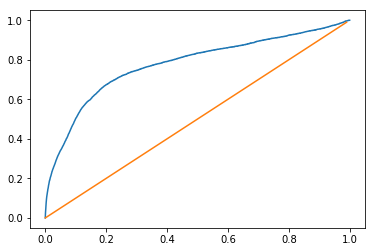

In [6]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(Y,model2.predict(X))
plt.plot(fpr,tpr)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
roc_auc_score(Y,model2.predict(X)),model2.evaluate(X,Y)
